# Set environment

In [1]:
### tools
import numpy as np
import pandas as pd

### string tools
import string
import textwrap

### read data
import json
import xml.etree.ElementTree as ET
import xlrd

### plot & format
from IPython.display import display, HTML
import matplotlib.pyplot as plt

### mapreduce & pipe & curry
from functools import reduce
import toolz as tz
import toolz.curried as c

### directories
datadir = "./data/s01/"

### helper function
head = lambda x: x[:6]
tail = lambda x: x[-6:]

# Working with different data types

This is a review of basic Python from BIOS 821 as well as practice manipulaitng data formats common in medical data.

## Text

**1**. (10 points)

Read the text file `data/s01/alice.txt` and count the number of occrrences of 'Alice' in the text.

-----

Take a look at the text file

In [2]:
!!head -5 ./data/s01/alice.txt

['The Project Gutenberg EBook of Alice in Wonderland, by Lewis Carroll',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included']

Read and count the occurrences of "Alice". Note that there are upper- and lower-case "alice" in the file.  
Note: [use maketrans to remove punctuation](https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate)

**find alice in another word**

In [22]:
### prepare for remove punctuation
tran_table = str.maketrans("", "", string.punctuation)

### read the file and count "Alice"
res = tz.pipe(
    datadir + "alice.txt",
    open,
    c.map(lambda x: x.translate(tran_table)),
    c.map(lambda x: x.count("Alice"))
)

### get all the occurence of Alice
sum(res)
#list(res)

172

-----

## JSON

**2**. (20 points)

Use `curl` to download the file at `https://swapi.co/api/people/1/` as `luke.json` in `data/s01`. Find the body mass index (BMI) of Luke Skywalker, rounded to 1 decimal place, and print the BMI category for Luke.

BMI Categories: 

- Underweight = <18.5
- Normal weight = 18.5–24.9 
- Overweight = 25–29.9 
- Obesity = BMI of 30 or greater

Note: Use the `json` package.

-----

download and take a look at the file

In [11]:
%%bash
DATADIR="./data/s01"
URL="https://swapi.co/api/people/1/"
FILENAME="luke.json"

curl $URL -o ${DATADIR}/${FILENAME}
echo ---------------------
ls ${DATADIR}
echo ---------------------
head ${DATADIR}/${FILENAME}

---------------------
alice.txt
ecoli.fna
luke.json
patient.xml
pony.jpg
touristexp.xls
---------------------
{"name":"Luke Skywalker","height":"172","mass":"77","hair_color":"blond","skin_color":"fair","eye_color":"blue","birth_year":"19BBY","gender":"male","homeworld":"https://swapi.co/api/planets/1/","films":["https://swapi.co/api/films/2/","https://swapi.co/api/films/6/","https://swapi.co/api/films/3/","https://swapi.co/api/films/1/","https://swapi.co/api/films/7/"],"species":["https://swapi.co/api/species/1/"],"vehicles":["https://swapi.co/api/vehicles/14/","https://swapi.co/api/vehicles/30/"],"starships":["https://swapi.co/api/starships/12/","https://swapi.co/api/starships/22/"],"created":"2014-12-09T13:50:51.644000Z","edited":"2014-12-20T21:17:56.891000Z","url":"https://swapi.co/api/people/1/"}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   702    0   702    0     0   5124      0 --:--:-- --:--:-- --:--:--  5086


read in the json file and parse it to an dictionary in python

In [9]:
f = open(datadir + "luke.json")
lines = json.load(f)
f.close()

calculate body mass index (BMI) of Luke Skywalker, rounded to 1 decimal place 

In [10]:
wt  = int(lines['mass'])
ht  = int(lines['height']) / 100
bmi = round(wt / ht**2, 1)

print("BMI of Luke:", bmi)

BMI of Luke: 26.0


print the BMI category for Luke
- Underweight = <18.5
- Normal weight = 18.5-24.9
- Overweight = 25-29.9
- Obesity = BMI of 30 or greater

In [7]:
a_str = "Luke is "

if bmi <= 18.5:
    a_str += "Underweight"   # Underweight = <18.5
elif bmi <= 24.9:
    a_str += "Normal weight" # Normal weight = 18.5-24.9
elif bmi <= 29.9:
    a_str += "Overweight"    # Overweight = 25-29.9
else:
    a_str += "Obesity"       # Obesity = BMI of 30 or greater
    
print(a_str)

Luke is Overweight


-----

## XML

**3**. (20 points)

Read the XML file in `data/s01/patient.xml` and find all the unique FHIR tags used. FHIR tags start with `{http://hl7.org/fhir}`.

Note: Use the `xml.etree` package.

-----

In [8]:
%%bash
DATADIR="./data/s01"
FILENAME="patient.xml"
head -10 ${DATADIR}/${FILENAME}

<Patient xmlns="http://hl7.org/fhir">
  <id value="example"/> 
  <text> 
    <status value="generated"/> 
    <div xmlns="http://www.w3.org/1999/xhtml">
      <table> 
        <tbody> 
          <tr> 
            <td> Name</td> 
            <td> Peter James 


get **FHIR** tags in the xml (Note: [get all the tags in the xml](https://stackoverflow.com/questions/29596584/getting-a-list-of-xml-tags-in-file-using-xml-etree-elementtree))

In [2]:
tags_fhir = tz.pipe(
    datadir + "patient.xml",
    ET.parse,                       # read xml
    lambda x: x.iter(),             # get the elements
    c.map(lambda x: x.tag),         # get the tag of each elements
    c.filter(lambda x: "fhir" in x) # find FHIR tags used. FHIR tags start with {http://hl7.org/fhir}
)

display(set(tags_fhir))

{'{http://hl7.org/fhir}Patient',
 '{http://hl7.org/fhir}active',
 '{http://hl7.org/fhir}address',
 '{http://hl7.org/fhir}assigner',
 '{http://hl7.org/fhir}birthDate',
 '{http://hl7.org/fhir}city',
 '{http://hl7.org/fhir}code',
 '{http://hl7.org/fhir}coding',
 '{http://hl7.org/fhir}contact',
 '{http://hl7.org/fhir}deceasedBoolean',
 '{http://hl7.org/fhir}display',
 '{http://hl7.org/fhir}district',
 '{http://hl7.org/fhir}end',
 '{http://hl7.org/fhir}extension',
 '{http://hl7.org/fhir}family',
 '{http://hl7.org/fhir}gender',
 '{http://hl7.org/fhir}given',
 '{http://hl7.org/fhir}id',
 '{http://hl7.org/fhir}identifier',
 '{http://hl7.org/fhir}line',
 '{http://hl7.org/fhir}managingOrganization',
 '{http://hl7.org/fhir}name',
 '{http://hl7.org/fhir}period',
 '{http://hl7.org/fhir}postalCode',
 '{http://hl7.org/fhir}rank',
 '{http://hl7.org/fhir}reference',
 '{http://hl7.org/fhir}relationship',
 '{http://hl7.org/fhir}start',
 '{http://hl7.org/fhir}state',
 '{http://hl7.org/fhir}status',
 '{htt

-----

## Time series (structured data)

**4**. (20 points)

Read the worksheet `Tourist arrivals` in the file `data/s01/touristexp.xls` into a `pandas` data frame. Drop any rows with missing values. Show a table of arrivals to `United States` where the rows are the `Region or origin` and the columns are years.

try to take a look at the file

In [10]:
%%bash
DATADIR="./data/s01"
FILENAME="touristexp.xls"
head -1 ${DATADIR}/${FILENAME}

   ��            � �   	 ��   �        � �   , ��   �        � �   * ��   �        � �  	               � �  


There are four sheets in the excel file

In [11]:
xls = xlrd.open_workbook(datadir + "touristexp.xls", on_demand = True)
print(xls.sheet_names())

['Presentation', 'Tourist arrivals', 'Tourist expenditure ', 'Expenditure per tourist (2004)']


Read the worksheet "Tourist arrivals"

In [12]:
dat = pd.read_excel(datadir + "touristexp.xls", sheet_name = "Tourist arrivals")
display(head(dat))
display(tail(dat))

,Country or Area,Year,Region of origin,Value,Value Footnotes
0,Albania,2005,Americas,34816,1
1,Albania,2005,Europe,703205,1
2,Albania,2005,"Asia, East and South East/Oceania",5444,1
3,Albania,2005,Southern Asia,354,1
4,Albania,2005,Western Asia,837,1
5,Albania,2005,Region not specified,3007,1


,Country or Area,Year,Region of origin,Value,Value Footnotes
7555,87,Data according to IBIS-Survey (Incoming Visito...,NaN,NaN,NaN
7556,88,Hotels and health establishments.,NaN,NaN,NaN
7557,89,"Hotels, motels and inns.",NaN,NaN,NaN
7558,90,Data source: The survey of Incoming Tourism in...,NaN,NaN,NaN
7559,91,Excluding private accommodation.,NaN,NaN,NaN
7560,92,Domestic tourism and arrivals of nationals res...,NaN,NaN,NaN


[rename column names to remove the space](https://github.com/pandas-dev/pandas/issues/6508)

In [13]:
cols = dat.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
dat.columns = cols

display(head(dat))

,Country_or_Area,Year,Region_of_origin,Value,Value_Footnotes
0,Albania,2005,Americas,34816,1
1,Albania,2005,Europe,703205,1
2,Albania,2005,"Asia, East and South East/Oceania",5444,1
3,Albania,2005,Southern Asia,354,1
4,Albania,2005,Western Asia,837,1
5,Albania,2005,Region not specified,3007,1


Process the data file
- Drop any rows with missing values. 
- arrivals to United States 
- show the rows are the Region or origin and the columns are years.

In [14]:
### arrange the dataframe and spread the df so that 
### row = "Region or origin" and column = "Year"
df = (dat
      .dropna()
      .query("Country_or_Area == 'United States'")
      .pivot(index = "Region_of_origin", 
             columns = "Year", 
             values = "Value"))

display(df)

Year,2000,2001,2002,2003,2004,2005
Region_of_origin,,,,,,
Africa,295090,286783,241011,236067,240488,251654
Americas,30356382,29577703,28035856,26368298,29195830,31178408
"Asia, East and South East/Oceania",7921004,6535276,5888710,5192366,6086708,6518211
Europe,12052331,9906957,8964202,8981711,10055657,10701847
Southern Asia,362634,362792,324315,329660,370315,411277
Total,51236701,46906868,43580707,41218213,46086257,49205528
Western Asia,249260,237357,126613,110111,137259,144131


-----

## Image

**5**. (20 points)

Use the `imread` function to read in the JPG image `data/s01/pony.jp` as a `numpy` array. What are the dimensions of the array? Display the image using `matplotlib`. Set all values in the `red` channel to 0. Redisplay the image. Make the region in the rectable with width between 300 and 400 pixels and height between 200 and 300 pixels black. Redisplay the image. 

Note: In NumPy indexing, the first dimension corresponds to rows, while the second corresponds to columns, with the origin on the top-left corner. 

-----

use imread function to read in the jpg image pony.jpg and display the image using matplotlib

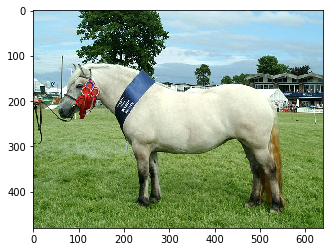

In [3]:
img = plt.imread(datadir + "pony.jpg")
plt.imshow(img)
plt.show()

What are the dimensions of the array?

In [4]:
img.shape

(480, 640, 3)

Set all values in the red channel to 0. Redisplay the image.

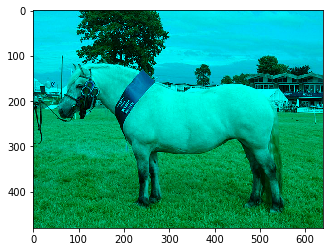

In [5]:
### set red channel into zero
img_red0 = img.copy()
img_red0[:, :, 0] = 0

### replot the image
plt.imshow(img_red0)
plt.show()

Make the region in the rectable with width between 300 and 400 pixels and height between 200 and 300 pixels black. Redisplay the image.

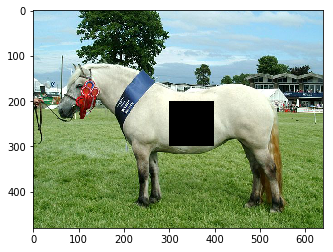

In [7]:
# row --- height between 200 and 300 pixels
# col --- width  between 300 and 400 pixels
img_rect = img.copy()
img_rect[200:300, 300:400, 0:3] = 256
plt.imshow(img_rect)
plt.show()

-----

## Genomics data

**6**. (10 points)

Join the first 10 lines containing sequence data of the E. Coli genome found in FASTA file `data/s01/ecoli.fna` into a single string. Note that header lines start with '>' in the FASTA format. Print the reverse complement of the joined sequence in lines of length 80. 

Use `textwrap` to format the fixed width output.

-----

read in the first 10 lines of E. coli Fasta file

In [19]:
### read 10 lines
lines = tz.pipe(
    datadir + "ecoli.fna",
    open,
    c.take(10),
    c.map(str.strip)
) # end of pipe

get header and sequence; use textwrap for format the output

In [20]:
### get header and sequence
lines = list(lines)
header = lines[0]
seq    = reduce(lambda a, b: a + b, lines[1:])

### format the string into fixed width output using textwrap
dedented_text = textwrap.dedent(seq).strip()
seq_txtwrap   = textwrap.fill(dedented_text, width = 80)

### output the header and sequence
print(header)
print(seq_txtwrap)

>NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTG
GTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGAC
AGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGT
AACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGG
TAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCG
ATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTG
GCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTT
GACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAA
AACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAA


Print the reverse complement of the joined sequence in lines of length 80

In [21]:
### Reverse complement of the sequence
tran_table = str.maketrans("ATCG", "TAGC")
seq_rc = seq.translate(tran_table) # complement
seq_rc = seq_rc[::-1]              # reverse

### format the string into fixed width output using textwrap
dedented_text = textwrap.dedent(seq_rc).strip()
seq_txtwrap   = textwrap.fill(dedented_text, width = 80)

### output the header and sequence
print(header + " (reverse complement)")
print(seq_txtwrap)

>NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome (reverse complement)
TTTCTCGCCACGGCAAATCAGCGCAGCGTTGATGCTATCCGGGCACTGCCCCAACAAACTAATGCCATGCAGGACATGTT
TTATTTGGGCAAATTCCTGATCGACGAAAGTTTTCAATTGCGCCAGCGGGAACCCCGGCTGGGCGGCGGCGAGTCCCGTC
AAAAGTTCGGCAAAAATACGTTCGGCATCGCTGATATTGGGTAAAGCATCCTGGCCGCTAATGGTTTTTTCAATCATCGC
CACCAGGTGGTTGGTGATTTTGGCGGGGGCAGAGAGGACGGTGGCCACCTGCCCCTGCCTGGCATTGCTTTCCAGAATAT
CGGCAACACGCAGAAAACGTTCTGCATTTGCCACTGATGTACCGCCGAACTTCAACACTCGCATGGTTGTTACCTCGTTA
CCTTTGGTCGAAAAAAAAAGCCCGCACTGTCAGGTGCGGGCTTTTTTCTGTGTTTCCTGTACGCGTCAGCCCGCACCGTT
ACCTGTGGTAATGGTGATGGTGGTGGTAATGGTGGTGCTAATGCGTTTCATGGATGTTGTGTACTCTGTAATTTTTATCT
GTCTGTGCGCTATGCCTATATTGGTTAAAGTATTTAGTGACCTAAGTCAATAAAATTTTAATTTACTCACGGCAGGTAAC
CAGTTCAGAAGCTGCTATCAGACACTCTTTTTTTAATCCACACAGAGACATATTGCCCGTTGCAGTCAGAATGAAAAGCT
